# Loading libraries and data

In [2]:
import numpy as np
import pandas as pd
import csv
from matplotlib import animation as ani, pyplot as plt
import seaborn as sns #pretty graphics R style

from IPython.display import HTML

plt.style.use('seaborn-darkgrid')

import matplotlib as mpl 
import matplotlib.pyplot as plt #graphics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler #library for the rescaling
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
import getpass
from pathlib import Path

In [32]:
if getpass.getuser() == 'daniel':
    data_file_path = Path("/home/daniel/PhD/PhD classes/Python Machine learning/final-project")
    # Lets read the trining dataset
    data_train = pd.read_csv(data_file_path / 'data' / 'train_V2.csv')
    # Now we read the training data set
    score = pd.read_csv(data_file_path/  'data' / 'score.csv')
    dict_features_path = data_file_path /  'data' / 'dictionary.csv'
    dict_features = pd.read_csv(dict_features_path, delimiter=';', header=None)
else:
      data_file_path = "C:/Users/mhinojosalee/Downloads/Machine learning with Python\Exam/"
      # Lets read the trining dataset
      data_train = pd.read_csv(data_file_path+'train_V2.csv')
      # Now we read the training data set
      score = pd.read_csv(data_file_path+'score.csv')

In [33]:
print(data_train.shape)
data_train.head()

(5000, 53)


,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


# Examining the features of the tabular data

I am importing dictionary with the description of the variables

In [36]:
dict_features
dict_features.columns=['keys',
                       'values']
dict_features.set_index('keys').to_dict()['values']

{'outcome_profit': 'profit of last visit',
 'outcome_damage_inc': 'damage incident in last visit',
 'outcome_damage_amount': 'damage amount after last visit',
 'crd_lim_rec': 'Recommended limit hotel credit ',
 'credit_use_ic': 'previously used hotel credit',
 'gluten_ic': 'allergic to gluten',
 'lactose_ic': 'lactose intolerant',
 'insurance_ic': 'use of hotel insurance',
 'spa_ic': 'spa user',
 'empl_ic': 'employee of chain',
 'cab_requests': 'number of cab requests',
 'married_cd': 'marital status',
 'bar_no': 'number of hotel bar visits',
 'sport_ic': 'user of sports facilities',
 'neighbor_income': 'Mean taxable income of neighborhood',
 'age': 'age',
 'marketing_permit': 'marketing contact allowed',
 'urban_ic': 'from urban region (vs rural)',
 'region': 'adress region',
 'dining_ic': 'use of in-hotel restaurants',
 'presidential': 'previous use of presidential suite',
 'client_segment': 'segment of client',
 'sect_empl': 'employment sector',
 'prev_stay': 'previous stay at hotel

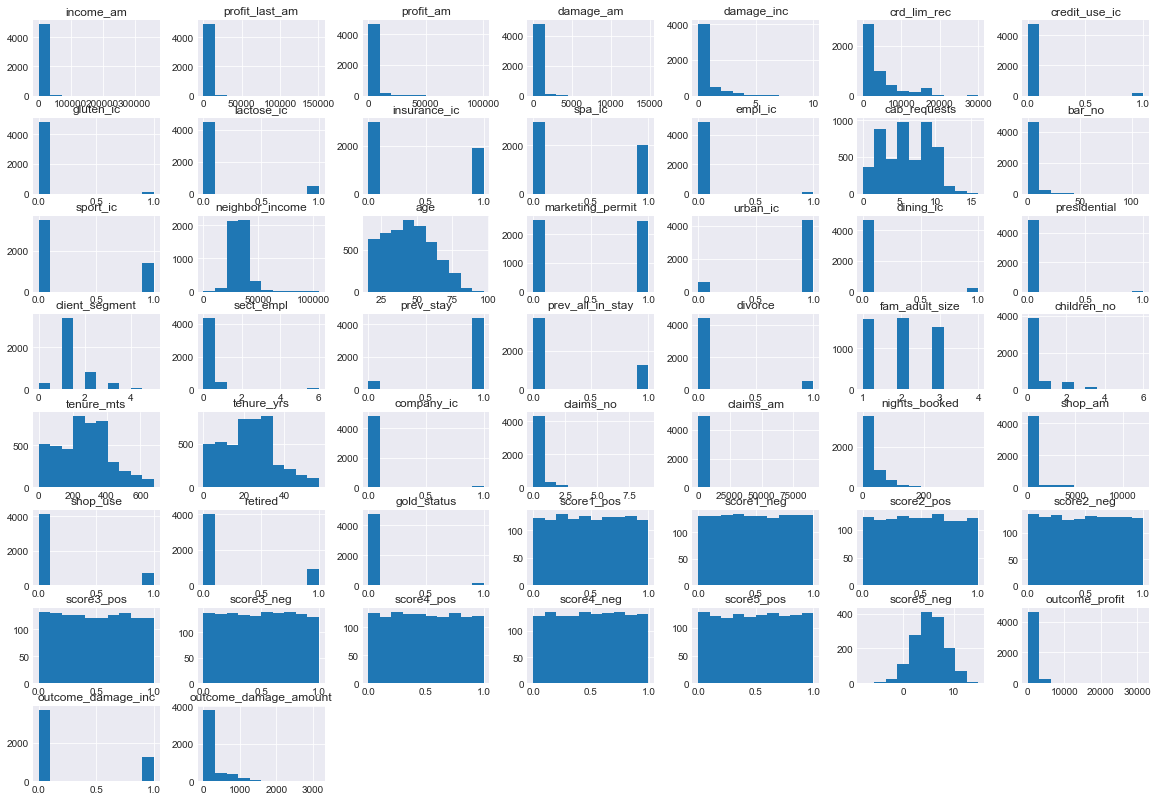

In [8]:
_ = data_train.hist(figsize=(20, 14))

In [5]:
pd.options.display.max_columns = None
data_train.describe()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
count,4947.000000,4947.000000,4947.000000,4954.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4970.000000,4999.000000,4912.000000,4947.000000,4947.000000,4761.000000,4947.000000,4947.000000,4947.000000,4912.000000,4912.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4608.000000,4608.000000,4947.000000,4947.000000,4973.000000,4947.000000,4947.000000,4912.000000,4947.000000,4947.000000,1.225000e+03,1.314000e+03,1.209000e+03,1.304000e+03,1.261000e+03,1.367000e+03,1.223000e+03,1.324000e+03,1.232000e+03,1493.000000,5000.000000,5000.000000,5000.000000
mean,2281.260158,696.057712,3637.900950,145.952967,0.352335,3298.716394,0.041237,0.024661,0.094199,0.390944,0.401811,0.024205,6.051507,5.646250,0.287043,32778.558916,44.901152,0.495452,0.883970,0.049267,0.004275,1.298565,0.213463,0.889832,0.252678,0.102486,1.960986,0.385082,273.111545,22.780165,0.018597,0.218314,121.078826,28.992521,403.019960,0.151873,0.182131,0.034769,4.997356e-01,5.003663e-01,4.985522e-01,4.967340e-01,4.942801e-01,4.985876e-01,4.962065e-01,5.013962e-01,5.009593e-01,5.192953,1967.310930,0.255400,189.970736
std,8365.254507,3051.119275,5726.625669,581.068095,0.889449,4549.646039,0.198858,0.155107,0.292134,0.488011,0.490313,0.153700,3.112104,5.052513,0.452427,6858.671948,16.225094,0.500030,0.320293,0.216447,0.065252,0.800831,0.826006,0.313130,0.434592,0.303317,0.805545,0.832933,152.498416,12.719429,0.135111,0.712408,1783.146726,37.480510,1335.935144,0.358934,0.385991,0.183212,2.879255e-01,2.887168e-01,2.877572e-01,2.897994e-01,2.899165e-01,2.877292e-01,2.886538e-01,2.876226e-01,2.901323e-01,3.159868,1371.061266,0.436129,379.005941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,-7.871775,10.680000,0.000000,0.000000
25%,229.000000,0.000000,1638.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,28630.000000,31.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,154.000000,13.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.520205e-01,2.510338e-01,2.521282e-01,2.454209e-01,2.405574e-01,2.495061e-01,2.474100e-01,2.506703e-01,2.514905e-01,3.124958,1333.320000,0.000000,0.000000
50%,469.000000,52.000000,1889.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,5.000000,0.000000,31990.000000,45.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,271.000000,23.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,4.974162e-01,4.986215e-01,4.987791e-01,4.985832e-01,4.942465e-01,5.016458e-01,4.933486e-01,5.020603e-01,5.029121e-01,5.188006,1721.235000,0.000000,0.000000
75%,1688.000000,810.000000,3165.500000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,8.000000,1.000000,35924.000000,57.000000,1.000000,1.00

In [6]:
#total = data_train.isnull().sum().sort_values(ascending=False)
#percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
#(data_train.isnull().sum(axis=1))[data_train.isnull().sum(axis=1) > 30]
#table
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#print(missing_data.head(30))
#print(data_train['score2_pos'].value_counts())  ##I am not sure why we do this.... do you know???


#data_train = data_train.drop((missing_data[missing_data['Percent'] > 0.30]).index,1)
data_train.shape
data_train.head()
#data_train.dropna(inplace=True) #we could drop all that is NaN, but we will loose observations. (4425, 43) instead of (4425, 43) 

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,spa_ic,empl_ic,cab_requests,married_cd,bar_no,sport_ic,neighbor_income,age,marketing_permit,urban_ic,dining_ic,presidential,client_segment,sect_empl,prev_stay,prev_all_in_stay,divorce,fam_adult_size,children_no,tenure_mts,tenure_yrs,company_ic,claims_no,claims_am,nights_booked,gender,shop_am,shop_use,retired,gold_status,score1_pos,score1_neg,score2_pos,score2_neg,score3_pos,score3_neg,score4_pos,score4_neg,score5_pos,score5_neg,outcome_profit,outcome_damage_inc,outcome_damage_amount
0,227.0,0.0,3201.0,888.0,6.0,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,True,2.0,1.0,28936.0,37.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,476.0,40.0,0.0,0.0,0.0,209.0,M,0.000000,0.0,0.0,0.0,0.467768,0.98334,NaN,NaN,NaN,NaN,0.838147,0.082288,NaN,NaN,1791.66,0,0.00
1,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,True,3.0,0.0,16674.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,2.0,0.0,0.0,0.0,4.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.955259,1672.78,1,829.66
2,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,4.0,0.0,32552.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,95.0,8.0,0.0,0.0,0.0,6.0,M,0.000000,0.0,0.0,0.0,NaN,NaN,0.232375,0.099529,NaN,NaN,NaN,NaN,0.101955,1.743020,1001.40,0,0.00
3,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,True,8.0,1.0,32252.0,37.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,NaN,NaN,0.0,0.0,0.0,4.0,V,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.889793,NaN,NaN,NaN,NaN,1785.59,0,0.00
4,4091.0,1028.0,3425.0,785.0,2.0,14000.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,False,2.0,1.0,29605.0,26.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,354.0,30.0,0.0,0.0,0.0,3.0,V,1454.210627,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.330503,0.766294,0.490486,0.542445,NaN,NaN,3140.74,0,0.00


In [7]:
data_train.columns

Index(['income_am', 'profit_last_am', 'profit_am', 'damage_am', 'damage_inc',
       'crd_lim_rec', 'credit_use_ic', 'gluten_ic', 'lactose_ic',
       'insurance_ic', 'spa_ic', 'empl_ic', 'cab_requests', 'married_cd',
       'bar_no', 'sport_ic', 'neighbor_income', 'age', 'marketing_permit',
       'urban_ic', 'dining_ic', 'presidential', 'client_segment', 'sect_empl',
       'prev_stay', 'prev_all_in_stay', 'divorce', 'fam_adult_size',
       'children_no', 'tenure_mts', 'tenure_yrs', 'company_ic', 'claims_no',
       'claims_am', 'nights_booked', 'gender', 'shop_am', 'shop_use',
       'retired', 'gold_status', 'score1_pos', 'score1_neg', 'score2_pos',
       'score2_neg', 'score3_pos', 'score3_neg', 'score4_pos', 'score4_neg',
       'score5_pos', 'score5_neg', 'outcome_profit', 'outcome_damage_inc',
       'outcome_damage_amount'],
      dtype='object')

In [9]:
data_feat = data_train.drop(['outcome_profit', 'outcome_damage_inc', 'outcome_damage_amount'], axis=1)
data_feat.shape

(5000, 50)

In [10]:
print(score.shape)
datafull = pd.concat([data_feat, score])
print(datafull.shape)
print(datafull['client_segment'].value_counts())
print(datafull['sect_empl'].value_counts())
print(datafull['gender'].value_counts())
print(datafull['retired'].value_counts())
print(datafull['gold_status'].value_counts())
print(datafull['prev_stay'].value_counts())
print(datafull['divorce'].value_counts())
datafull['married_cd'].value_counts()

#I started with the separated categories, but then I decided a mode imputer for NaN
#datafull['client_segment'] = pd.Categorical(datafull['client_segment'])
#datafull['sect_empl'] = pd.Categorical(datafull['sect_empl'])
#datafull['retired'] = pd.Categorical(datafull['retired'])
#datafull['gold_status'] = pd.Categorical(datafull['gold_status'])
#datafull['prev_stay'] = pd.Categorical(datafull['prev_stay'])
#datafull['divorce'] = pd.Categorical(datafull['divorce'])

(500, 50)
(5500, 50)
1.0    3712
2.0     925
0.0     352
3.0     329
4.0      87
5.0      38
Name: client_segment, dtype: int64
0.0    4820
1.0     468
6.0      78
2.0      45
4.0      29
3.0       3
Name: sect_empl, dtype: int64
M    2734
V    2709
Name: gender, dtype: int64
0.0    4456
1.0     987
Name: retired, dtype: int64
0.0    5241
1.0     202
Name: gold_status, dtype: int64
1.0    4848
0.0     595
Name: prev_stay, dtype: int64
0.0    4884
1.0     559
Name: divorce, dtype: int64


True     4460
False    1040
Name: married_cd, dtype: int64

In [11]:
#Married_ic is a bolean

impute_mode = SimpleImputer (strategy='most_frequent')
for cols in ['client_segment', "credit_use_ic", "gluten_ic", "lactose_ic","insurance_ic","marketing_permit", "presidential", "urban_ic", "prev_all_in_stay", "shop_use", 
             "company_ic", "dining_ic", "spa_ic","sport_ic","empl_ic",'sect_empl', "retired", "gold_status", "prev_stay", 'divorce', "gender"]:  
      datafull[cols] = impute_mode.fit_transform(datafull[[cols]])
print(datafull.shape)
print (datafull.head())
print(datafull.columns)
datafull = pd.concat([datafull,pd.get_dummies(datafull[['gender']])], axis=1)

(5500, 50)
   income_am  profit_last_am  profit_am  damage_am  damage_inc  crd_lim_rec  \
0      227.0             0.0     3201.0      888.0         6.0      15000.0   
1      268.0            16.0     1682.0        0.0         0.0        750.0   
2      283.0            23.0     1673.0        0.0         0.0        750.0   
3      227.0             0.0     1685.0        0.0         0.0          0.0   
4     4091.0          1028.0     3425.0      785.0         2.0      14000.0   

   credit_use_ic  gluten_ic  lactose_ic  insurance_ic  spa_ic  empl_ic  \
0            0.0        0.0         0.0           0.0     1.0      0.0   
1            0.0        0.0         0.0           1.0     1.0      0.0   
2            0.0        0.0         0.0           1.0     0.0      0.0   
3            0.0        0.0         0.0           0.0     0.0      0.0   
4            0.0        0.0         1.0           0.0     1.0      0.0   

   cab_requests  married_cd  bar_no  sport_ic  neighbor_income   age 

In [12]:
(datafull.isnull().mean())[datafull.isnull().mean() > 0.30]
print(datafull.shape)
datafull.dropna(thresh = datafull.shape[0]*0.3, axis = 1, inplace = True)
print(datafull.shape)

(5500, 52)
(5500, 42)


In [13]:
print(datafull.shape)
datafull.dropna(thresh = datafull.shape[1]*0.3, axis = 0, inplace = True)
print(datafull.shape)

(5500, 42)
(5500, 42)


In [14]:
print(datafull.isnull().sum().sum())
datafull.fillna(datafull.mean(), inplace=True)
print(datafull.isnull().sum().sum())

1976
0


In [15]:
scaler = StandardScaler()
datafull2 = pd.DataFrame(scaler.fit_transform(datafull))
datafull2.columns = datafull.columns
#And here I have an error... It is caused by having gender not coded as 0 and 1

ValueError: could not convert string to float: 'M'